In [2]:
class WeightedDiGraph:
    def __init__(self):
        self.g={}
    def add_node(self,node):
        if node in self.g:
            raise KeyError("NODE ALREADY IN GRAPH ....")
        self.g[node]=[]
    def add_edge(self,src,destination,weight):
        if src not in self.g:
            raise KeyError("SOURCE NOT IN GRAPH")
        if destination not in self.g:
            raise KeyError("DESTINATION NOT IN GRAPH")
        if destination in self.g[src]:
            return
        else:
            self.g[src].append((destination,weight))

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    G = nx.DiGraph()

    # Add nodes to the graph
    for node in graph.g.keys():
        G.add_node(node)

    # Add edges to the graph with weights
    for source, destinations in graph.g.items():
        for destination, weight in destinations:
            G.add_edge(source, destination, weight=weight)

    # Create a layout for the graph
    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', arrows=True)

    # Add edge labels
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Show the graph
    plt.show()
WeightedDiGraph.visualize_graph=visualize_graph

In [4]:
def dijkstra(self,start):
    not_visited=list(self.g.keys())
    inf=float('inf')
    dists={node:inf for node in not_visited}
    dists[start]=0
    
    while not_visited:
        current=min(not_visited,key=lambda node:dists[node])
        
        
        if dists[current]==inf:
            break
        not_visited.remove(current)
        nexts=self.g[current]
        un_visited_neighbour=[]
        for n in nexts:
            if n[0] in not_visited:
                label=n[0]
                dists_to=n[1]

                old_distance=dists[label]
                new_distance=dists[current]+dists_to
                if new_distance<old_distance:
                    dists[label]=new_distance
    print("ALL DISTANCE"+str(dists))
WeightedDiGraph.dijkstra=dijkstra       

In [5]:
def dijkstra_shortest_path(self,src,dest):
    #marks all nodes unvisited and store them
    to_visit=list(self.g.keys())
    print("TO VISIT : "+str(to_visit))
    #set distance to zero for initial node and infinity to rest of nodes
    inf=float('inf') #that's python for infinity
    dists={node:inf for node in to_visit}
    dists[src]=0
    print("ALL DISTANCES" + str(dists))
    best_paths={}
    best_paths[(src,src)]=[src ]  
    #lets loop
    while to_visit:
        print("-------------")
        
        #select the unvisited node with smallest distance
        #can't compare 'a' with 'b'  so,we compare dists['a'] with dists['b']
        current=min(to_visit,key=lambda node:dists[node])
        print("CURRENT : "+current)
        
        #current is now visited
        to_visit.remove(current) 
        
        #check to make sure min distance isn't infinity
        if dists[current]==inf:
            break
        
        #find unvisited neighbour for current node
        nexts=self.g[current]
        unvisited_neighbors=[]
        for n in nexts:
            if n[0] in to_visit: #recall that n is e.g('b',5)
                unvisited_neighbors.append(n)
        print("UNVISITED NEIGHBORS OF " + current + " : " + str(unvisited_neighbors))
        
        #calculated distance through the current node
        for n in unvisited_neighbors:
            label=n[0]  #node eg "a","b" e.t.c
            dist_to=n[1] #weight
            
            old_distance=dists[label]
            new_distance=dists[current]+dist_to
            
            #see which is better new or old one 
            if new_distance<old_distance:
                print("\nFound new best path ......")
                dists[label]=new_distance
                #also save the path
                #best way to get from src to label is src->current->label
                path_to_current=best_paths[(src,current)][:] # creating copy
                best_paths[(src,label)]=path_to_current
                best_paths[(src,label)].append(label)
                print("PREVIOUS BEST PATH TO CURRENT : ",best_paths[(src,current)])
                print("BEST PATH TO : ",best_paths[(src,label)])
                
                
        print("ALL DISTANCES " + str(dists))
    return best_paths[(src,dest)],dists[dest]
        
WeightedDiGraph.dijkstra_shortest_path=dijkstra_shortest_path
                        


In [6]:
d=WeightedDiGraph()
nodes=['a','b','c','d','e']
edges=[('a','b',4),('a','c',1),('c','e',25),('b','d',8),('e','d',3)]
for i in nodes:
    d.add_node(i)
for i in edges:
    d.add_edge(i[0],i[1],i[2])

 

In [7]:
d.dijkstra_shortest_path('a','e')

TO VISIT : ['a', 'b', 'c', 'd', 'e']
ALL DISTANCES{'a': 0, 'b': inf, 'c': inf, 'd': inf, 'e': inf}
-------------
CURRENT : a
UNVISITED NEIGHBORS OF a : [('b', 4), ('c', 1)]

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a']
BEST PATH TO :  ['a', 'b']

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a']
BEST PATH TO :  ['a', 'c']
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': inf, 'e': inf}
-------------
CURRENT : c
UNVISITED NEIGHBORS OF c : [('e', 25)]

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a', 'c']
BEST PATH TO :  ['a', 'c', 'e']
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': inf, 'e': 26}
-------------
CURRENT : b
UNVISITED NEIGHBORS OF b : [('d', 8)]

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a', 'b']
BEST PATH TO :  ['a', 'b', 'd']
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26}
-------------
CURRENT : d
UNVISITED NEIGHBORS OF d : []
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26}
-------------
C

(['a', 'c', 'e'], 26)

In [97]:
g=WeightedDiGraph()
nodes=['a','b','c','d','e','f']
edges=[('a','b',4),('a','c',1),('b','c',7),('b','d',8) ,('c','e',25),('c','d',3),('d','c',4),('e','f',8),('f','c',7)   ]
for i in nodes:
    g.add_node(i)
for i in edges:
    g.add_edge(i[0],i[1],i[2])
g.dijkstra_shortest_path('a','e')

TO VISIT : ['a', 'b', 'c', 'd', 'e', 'f']
ALL DISTANCES{'a': 0, 'b': inf, 'c': inf, 'd': inf, 'e': inf, 'f': inf}
-------------
CURRENT : a
UNVISITED NEIGHBORS OF a : [('b', 4), ('c', 1)]

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a']
BEST PATH TO :  ['a', 'b']

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a']
BEST PATH TO :  ['a', 'c']
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': inf, 'e': inf, 'f': inf}
-------------
CURRENT : c
UNVISITED NEIGHBORS OF c : [('e', 25), ('d', 3)]

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a', 'c']
BEST PATH TO :  ['a', 'c', 'e']

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a', 'c']
BEST PATH TO :  ['a', 'c', 'd']
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': 4, 'e': 26, 'f': inf}
-------------
CURRENT : b
UNVISITED NEIGHBORS OF b : [('d', 8)]
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': 4, 'e': 26, 'f': inf}
-------------
CURRENT : d
UNVISITED NEIGHBORS OF d : []
ALL DISTANCES {'a': 

(['a', 'c', 'e'], 26)

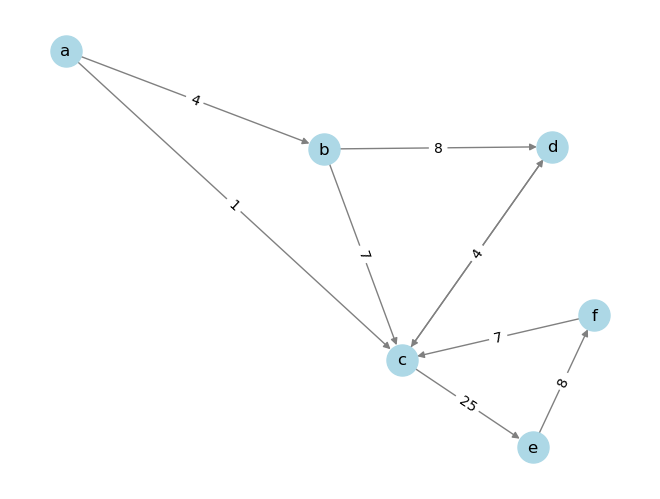

In [99]:
g=WeightedDiGraph()
nodes=['a','b','c','d','e','f']
edges=[('a','b',4),('a','c',1),('b','c',7),('b','d',8) ,('c','e',25),('c','d',3),('d','c',4),('e','f',8),('f','c',7)   ]
for i in nodes:
    g.add_node(i)
for i in edges:
    g.add_edge(i[0],i[1],i[2])
g.visualize_graph()

In [100]:
g.dijkstra_shortest_path('a','f')

TO VISIT : ['a', 'b', 'c', 'd', 'e', 'f']
ALL DISTANCES{'a': 0, 'b': inf, 'c': inf, 'd': inf, 'e': inf, 'f': inf}
-------------
CURRENT : a
UNVISITED NEIGHBORS OF a : [('b', 4), ('c', 1)]

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a']
BEST PATH TO :  ['a', 'b']

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a']
BEST PATH TO :  ['a', 'c']
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': inf, 'e': inf, 'f': inf}
-------------
CURRENT : c
UNVISITED NEIGHBORS OF c : [('e', 25), ('d', 3)]

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a', 'c']
BEST PATH TO :  ['a', 'c', 'e']

Found new best path ......
PREVIOUS BEST PATH TO CURRENT :  ['a', 'c']
BEST PATH TO :  ['a', 'c', 'd']
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': 4, 'e': 26, 'f': inf}
-------------
CURRENT : b
UNVISITED NEIGHBORS OF b : [('d', 8)]
ALL DISTANCES {'a': 0, 'b': 4, 'c': 1, 'd': 4, 'e': 26, 'f': inf}
-------------
CURRENT : d
UNVISITED NEIGHBORS OF d : []
ALL DISTANCES {'a': 

(['a', 'c', 'e', 'f'], 34)